# Understanding college debt
I want to see what types of universities have students in debt.  We will be using the college scorecard API from data.gov.  I am interested in a number of variables, these are admissions rate, tuition, median household income, student size, etc.

It seems that the UC office of president <a href="http://www.ucop.edu/institutional-research-academic-planning/_files/College%20Scorecard%20Brief.pdf">claims that the UC schools are a good deal</a> based on data from the college scorecard.

You should go begin by getting an <a href="https://api.data.gov/signup/">API key for data.gov</a>.  There are many data.gov APIs that you can use this key for and they have fairly relaxed limits on the number of requests.

The documentation for the API can be found here...<br>
https://github.com/RTICWDT/open-data-maker/blob/master/API.md<br>
https://collegescorecard.ed.gov/data/

Let's import some packages.

In [2]:
from urllib2 import Request, urlopen
import pandas as pd
import json
from matplotlib import pyplot as plt
from pandas.io.json import json_normalize
import requests
plt.style.use('ggplot')
%matplotlib inline

Here are some variable names that we will be interested in.

In [3]:
varnames = """id
school.name
school.degrees_awarded.predominant
2014.admissions.admission_rate.overall
2014.cost.tuition.in_state
2014.cost.tuition.out_of_state
2014.aid.median_debt.completers.overall
2014.aid.median_debt.noncompleters
2005.student.demographics.median_hh_income
2005.student.demographics.poverty_rate
2014.aid.federal_loan_rate
2014.aid.pell_grant_rate
2014.student.size
"""
varnames = varnames.replace("\n",",")


__Exercise (1)__ I would like to make a complicated query from the API.  An example query from the API is 

<pre>https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3&_fields=school.name,
2014.aid.pell_grant_rate&_sort=2014.student.size:desc&_page=1
&_per_page=100&api_key=YOURKEY
</pre>

Which can be parsed as  
1. the base url: https://api.data.gov/ed/collegescorecard/v1/schools.json, 
2. a filter of school.degrees_awarded.predominant=3, 
3. return the fields school.name,2014.aid.pell_grant_rate, 
4. sort by 2014.student.size in descending order, 
5. return 1 page of 100 entries, 
6. and use your api key

You can find a more complete description: https://github.com/RTICWDT/open-data-maker/blob/master/API.md

Fill in the following def that fits the following docstring, and gives the shown output.
<pre>
def query_url(key,fieldnames,filterstring,sortvar,numpages):
    """
    This takes all of the necessary parameters to form a query 
    to college scorecard
    Input: key (data.gov API key, string), fieldnames (list of variable 
      names), filterstring (string for filtering), sortvar (variable to 
      sort with by descending), numpages (number of pages to return)
    Output: url string
    """


query_url(key,fieldnames,'school.degrees_awarded.predominant=3',
  '2014.student.size',2)

https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3&_fields=id,school.name,school.degrees_awarded.predominant,school.degree_urbanization,2014.admissions.admission_rate.overall,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state,2014.aid.median_debt.completers.overall,2014.aid.median_debt.noncompleters,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.aid.federal_loan_rate,2014.aid.pell_grant_rate,2014.student.size&api_key=3qoMz6JiRtVPm7MZ1DLTtGNbcZMKZFskDdzhOYaI&_page=2&_per_page=100&_sort=2014.student.size:desc
</pre>

Try to reproduce the above behavior.

In [18]:
def query_url(key,fieldnames,filterstring,sortvar,numpages):
    url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?{id}'.format(id = filterstring)
    sortvar = sortvar+":_desc"
    fieldnames = fieldnames.replace('\n',',')
    fieldnames = fieldnames+ "school.degree_urbanization"
    a = requests.get(url,params = {"_fields":fieldnames,
                                '_page':numpages,
                                '_sort':sortvar,
                                '_per_page':100,
                                'api_key':key
                                         })
    return a
query_url("3qoMz6JiRtVPm7MZ1DLTtGNbcZMKZFskDdzhOYaI",varnames,'school.degrees_awarded.predominant=3',
  '2014.student.size',2).url

u'https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3&api_key=3qoMz6JiRtVPm7MZ1DLTtGNbcZMKZFskDdzhOYaI&_fields=id%2Cschool.name%2Cschool.degrees_awarded.predominant%2C2014.admissions.admission_rate.overall%2C2014.cost.tuition.in_state%2C2014.cost.tuition.out_of_state%2C2014.aid.median_debt.completers.overall%2C2014.aid.median_debt.noncompleters%2C2005.student.demographics.median_hh_income%2C2005.student.demographics.poverty_rate%2C2014.aid.federal_loan_rate%2C2014.aid.pell_grant_rate%2C2014.student.size%2Cschool.degree_urbanization&_per_page=100&_sort=2014.student.size%3A_desc&_page=2'

__Exercise (2)__ Make the query using Request and load the results into a DataFrame that makes sense.

In [26]:
dat = query_url("3qoMz6JiRtVPm7MZ1DLTtGNbcZMKZFskDdzhOYaI",varnames,'school.degrees_awarded.predominant=3','2014.student.size',1)
dat_1 = dat.json()
dat_1 = pd.DataFrame(dat_1["results"])
dat_1

,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.admissions.admission_rate.overall,2014.aid.federal_loan_rate,2014.aid.median_debt.completers.overall,2014.aid.median_debt.noncompleters,2014.aid.pell_grant_rate,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state,2014.student.size,id,school.degree_urbanization,school.degrees_awarded.predominant,school.name
0,NaN,NaN,NaN,0.3029,NaN,NaN,0.6971,9260.0,9260.0,88,139287,None,3,Carver Bible College
1,44042.0,20.889999,NaN,0.5375,18835.0,5500.0,0.7500,11700.0,11700.0,89,103787,None,3,American Indian College Inc
2,69397.0,7.130000,NaN,0.5941,28000.0,8942.0,0.2772,13410.0,13410.0,89,244190,None,3,Widener University-Delaware Law School
3,77290.0,4.420000,0.3299,0.1829,NaN,NaN,0.0610,44000.0,44000.0,90,197221,None,3,Webb Institute
4,59896.0,9.010000,NaN,0.4632,25503.5,6656.0,0.4000,NaN,NaN,90,102395,None,3,United States Sports Academy
5,NaN,NaN,0.4455,0.7059,NaN,5500.0,0.4706,25680.0,25680.0,91,455770,None,3,Providence Christian College
6,NaN,NaN,NaN,0.8000,9500.0,4750.0,0.0000,NaN,NaN,92,457183,None,3,Remington College of Nursing Orlando
7,NaN,NaN,NaN,0.5481,NaN,10690.0,0.5000,6200.0,6200.0,92,366003,None,3,South Florida Bible College and Theological Se...
8,58865.0,9.000000,NaN,0.8884,34135.5,6544.0,0.6157,NaN,NaN,93,402615,None,3,Colorado Technical University-Sioux Falls
9,52100.0,16.049999,0.5254,0.0000,NaN,NaN,0.2396,8600.0,8600.0,93,444413,None,3,Beis Medrash Heichal Dovid


__Exercise (3)__ Produce scatterplots to demonstrate the associations between student debt (for 'completers') and median household income, pell grant rates, student poverty rate, tuition, and federal loan rate.  Do you have an explanation for the associations that you are seeing?  Are there some surprising associations.

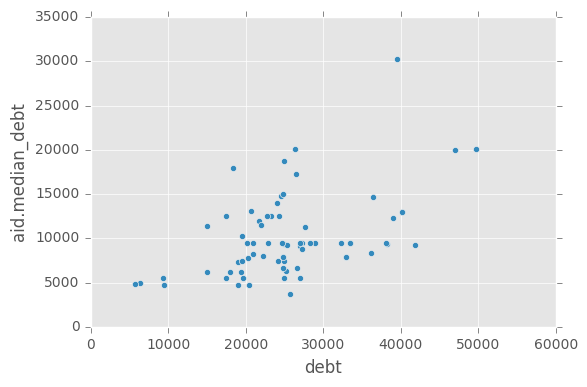

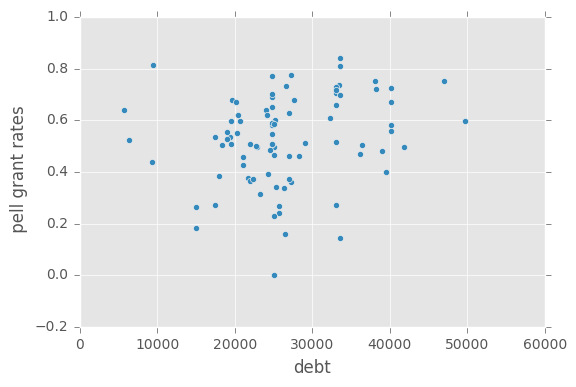

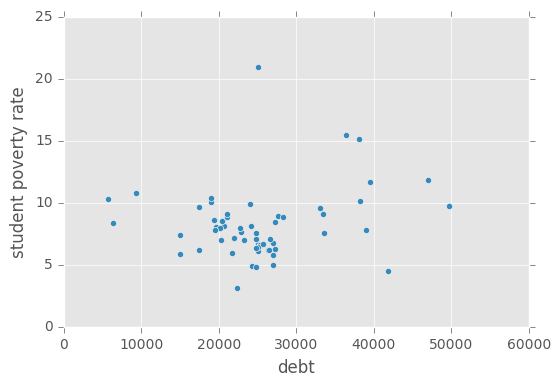

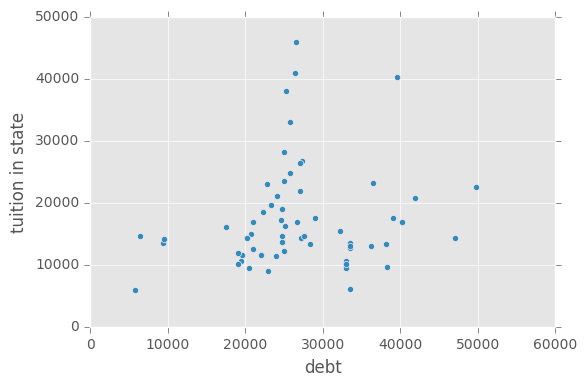

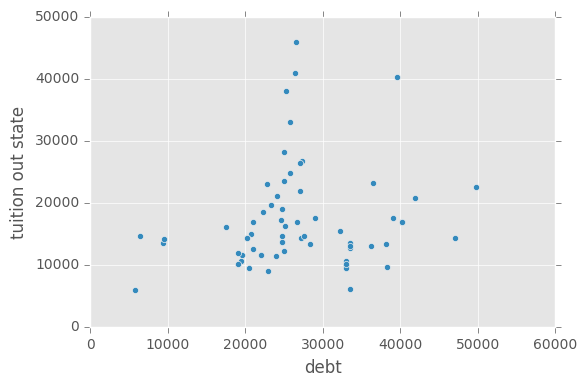

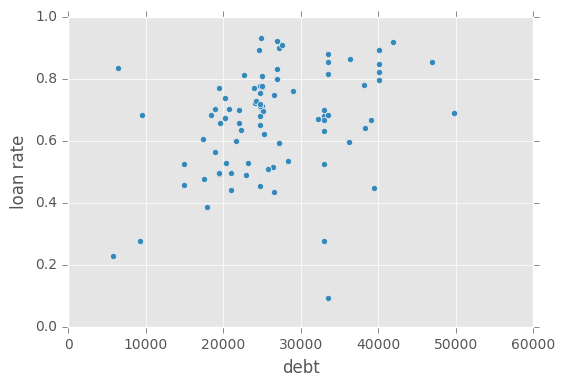

In [214]:
dat_1.plot(x = "2014.aid.median_debt.completers.overall",y = "2014.aid.median_debt.noncompleters",kind = "scatter" )
plt.xlabel("debt")
plt.ylabel("aid.median_debt")
plt.show()
dat_1.plot(x = "2014.aid.median_debt.completers.overall",y = "2014.aid.pell_grant_rate",kind = "scatter" )
plt.xlabel("debt")
plt.ylabel(" pell grant rates")
plt.show()
dat_1.plot(x = "2014.aid.median_debt.completers.overall",y = "2005.student.demographics.poverty_rate",kind = "scatter" )
plt.xlabel("debt")
plt.ylabel("student poverty rate")
plt.show()
dat_1.plot(x = "2014.aid.median_debt.completers.overall",y = "2014.cost.tuition.in_state",kind = "scatter" )
plt.xlabel("debt")
plt.ylabel("tuition in state")
plt.show()
dat_1.plot(x = "2014.aid.median_debt.completers.overall",y = "2014.cost.tuition.out_of_state",kind = "scatter" )
plt.xlabel("debt")
plt.ylabel("tuition out state")
plt.show()
dat_1.plot(x = "2014.aid.median_debt.completers.overall",y = "2014.aid.federal_loan_rate",kind = "scatter" )
plt.xlabel("debt")
plt.ylabel("loan rate")
plt.show()

When explaining median debt for graduating students, mdedian household income is observed to have a strong association. This cannot be explained empirically by larger tuition on a decreased rate of Pell grants. There are several possible explanations for this unexplained trend.
There is some unexplained mechanism by which the larger income students tend to accept more debt(perhaps due to higher credit score or expected future learnings)
The nature of universities and degree programs that lower/higher income students attempt influences their debt.
The sample is not representative of the population of universities and the association is due to sampling bias.
Further studies into the degree programs through the api and taking a larger and more inclusive sample can adress 2 and 3. 1 is much more difficult to validate.